# Setup

In [1]:
from fastai.vision.all import *
import timm

/home/carljvh/mambaforge/envs/ahri_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Training the model on all the images in L1 folder

Kernel crashes on the laptop with the dataset size so I'm commentign out and reducing training set size.

In [2]:
# path = Path('data/L1')
# dls = ImageDataLoaders.from_folder(
#     path, 
#     train='.', 
#     valid_pct=0.2,  # 20% of data used for validation
#     item_tfms=Resize(224)  # Resize images to 224x224 for ResNet18
# )

In [3]:
# # Create a ResNet18 model
# # learn = vision_learner(dls, 'convnext_tiny_in22k', metrics=accuracy)
# learn = vision_learner(dls, 'convnext_tiny.fb_in22k', metrics=accuracy)


# # Train the model
# learn.fine_tune(1a)

# Training model on 60 images

In [3]:
from fastai.vision.all import *
import random

# Define the path to your dataset
path = Path('.')
path_data = Path('data/L1')

# Function to limit the number of files in each category
def filter_by_count(fnames, count=20):
    """Limit the number of images to `count` per category."""
    filtered_fnames = []
    categories = {p.parent.name for p in fnames}
    for category in categories:
        cat_fnames = [fname for fname in fnames if fname.parent.name == category]
        filtered_fnames += random.sample(cat_fnames, min(len(cat_fnames), count))
    return filtered_fnames

# Load all the image files from the dataset
fnames = get_image_files(path_data)

# Filter to get 20 images per category
filtered_fnames = filter_by_count(fnames, count=200)

# Load the data using ImageDataLoaders with the filtered filenames
dls = ImageDataLoaders.from_name_func(
    path, 
    filtered_fnames, 
    label_func=lambda x: Path(x).parent.name,  # Convert string to Path object
    valid_pct=0.2,  # 20% of data used for validation
    item_tfms=Resize(64)  # Resize images to 224x224 for ConvNeXt
)



## Looking at batches

In [5]:
set_seed(42)

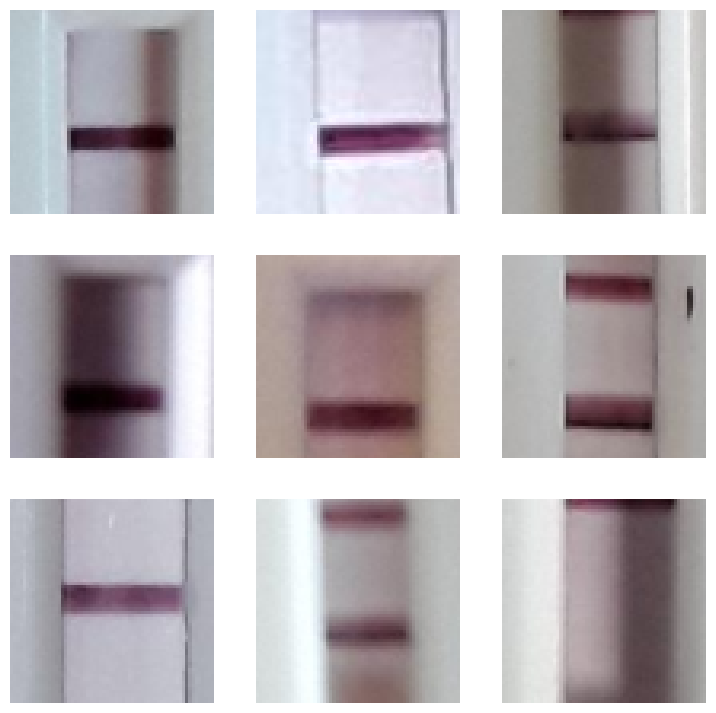

In [6]:
dls.show_batch()

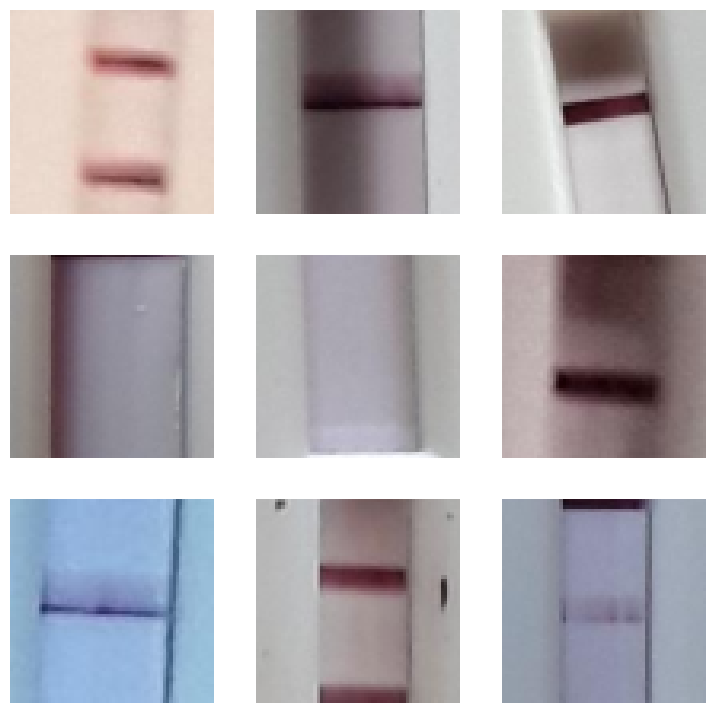

In [7]:
dls = ImageDataLoaders.from_name_func(
    path_data, 
    filtered_fnames, 
    label_func=lambda x: Path(x).parent.name,  # Convert string to Path object
    valid_pct=0.2,  # 20% of data used for validation
    item_tfms=Resize(64, method='crop')  # Resize images to 224x224 for ConvNeXt
)
dls.show_batch()

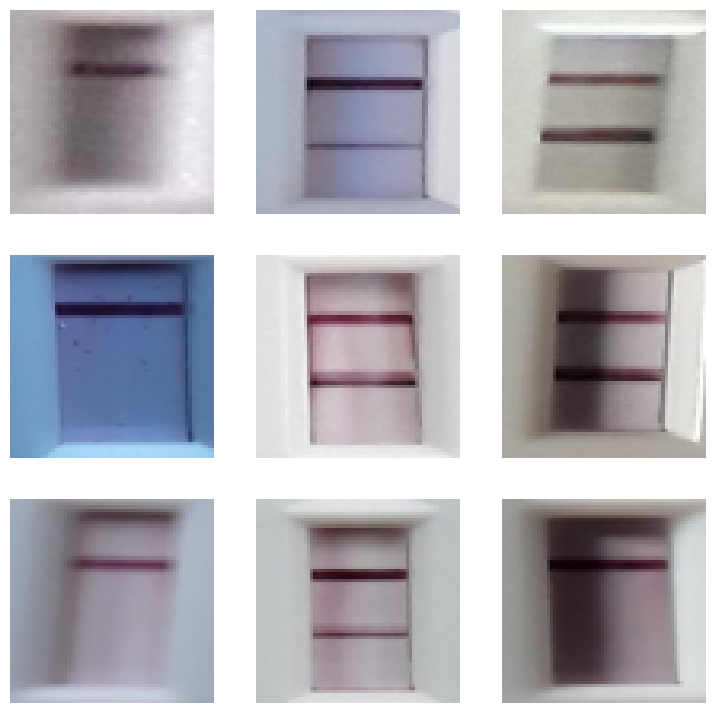

In [8]:
dls = ImageDataLoaders.from_name_func(
    path, 
    filtered_fnames, 
    label_func=lambda x: Path(x).parent.name,  # Convert string to Path object
    valid_pct=0.2,  # 20% of data used for validation
    item_tfms=Resize(64, method='squish')  # Resize images to 224x224 for ConvNeXt
)
dls.show_batch()

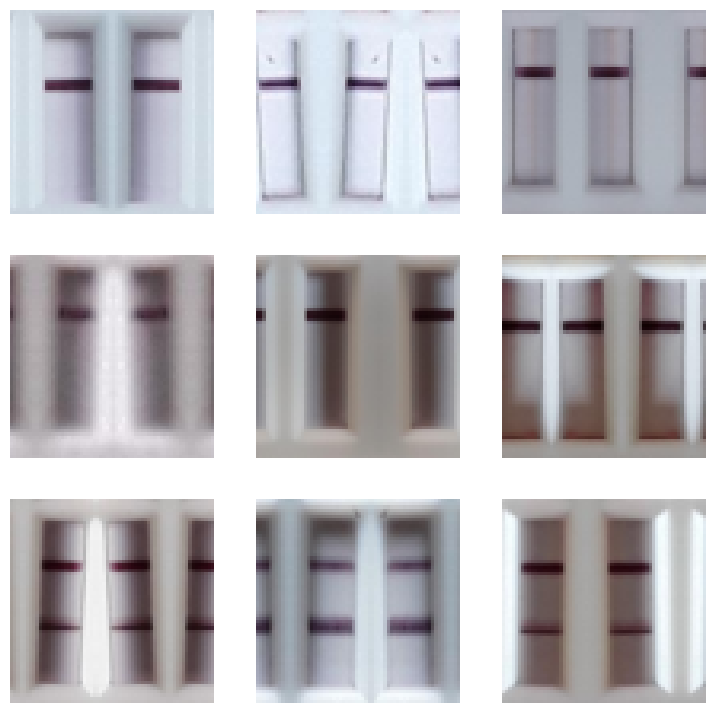

In [9]:
dls = ImageDataLoaders.from_name_func(
    path, 
    filtered_fnames, 
    label_func=lambda x: Path(x).parent.name,  # Convert string to Path object
    valid_pct=0.2,  # 20% of data used for validation
    item_tfms=Resize(64, method='pad', pad_mode='reflection')  # Resize images to 224x224 for ConvNeXt
)
dls.show_batch()

In [2]:
dls = ImageDataLoaders.from_name_func(
    path, 
    filtered_fnames, 
    label_func=lambda x: Path(x).parent.name,  # Convert string to Path object
    valid_pct=0.2,  # 20% of data used for validation
    item_tfms=Resize(64, method='pad', pad_mode='zeros')
    )
dls.show_batch()

NameError: name 'path' is not defined

# Training

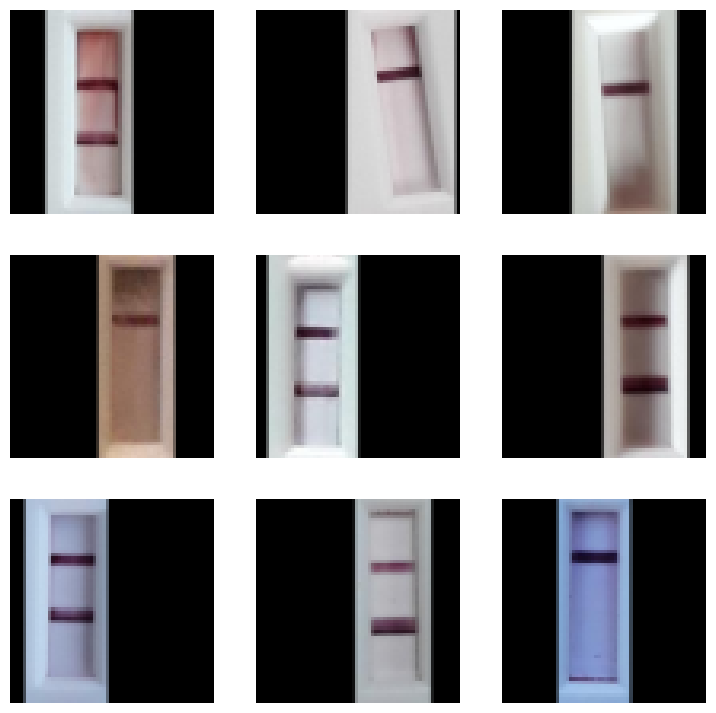

In [11]:
dls = ImageDataLoaders.from_name_func(
    path, 
    filtered_fnames, 
    label_func=lambda x: Path(x).parent.name,  # Convert string to Path object
    valid_pct=0.2,  # 20% of data used for validation
    item_tfms=Resize(64, method='pad', pad_mode='zeros'),
    bs=64
    )
dls.show_batch()

In [12]:
# # Create a ConvNeXt Tiny model pre-trained on ImageNet-22k
# learn = vision_learner(dls, 'convnext_tiny.fb_in22k', metrics=accuracy, pretrained=True)

# # Train the model
# learn.fine_tune(3)

## Training with different parameters


Options for tiny models from timm, text from chatgpt:

mobilenetv2_100:

This is a very lightweight and efficient model, commonly used in mobile and low-power environments.
It has around 3.5 million parameters.

mobilenetv3_small_100:

An even smaller version of MobileNetV3 designed for resource-constrained environments.
It has around 2.5 million parameters.


efficientnet_lite0:

This is a lighter variant of EfficientNet optimized for low-latency and mobile devices.
It has around 5.3 million parameters, with a good balance between efficiency and accuracy.


tf_efficientnet_b0:

While slightly larger, it is often one of the smallest models in the EfficientNet family and remains highly efficient.
It has around 5.3 million parameters.

In [13]:
# # Filter to get 200 images per category
# filtered_fnames = filter_by_count(fnames, count=200)

# dls = ImageDataLoaders.from_name_func(
#     path_data, 
#     filtered_fnames, 
#     label_func=lambda x: Path(x).parent.name,  # Convert string to Path object
#     valid_pct=0.2,  # 20% of data used for validation
#     item_tfms=Resize(64, method='pad', pad_mode='zeros'),
#     bs=64
#     )
# dls.show_batch()

# # Create a ConvNeXt Tiny model pre-trained on ImageNet-22k
# learn = vision_learner(dls, 'mobilenetv2_100', metrics=accuracy, pretrained=True)

# # Train the model
# learn.fine_tune(3)

In [14]:
# interp = ClassificationInterpretation.from_learner(learn)


In [15]:
# interp.plot_top_losses(k=9, nrows=3)


In [16]:
# interp.plot_confusion_matrix(figsize=(8,8))

In [17]:
# interp.most_confused(min_val=2)


In [18]:
# Using a lambda function somewhere so this thing can't be picled like this
# learn.export('models/hiv_conv_tiny.pkl')

# learn.save('hiv_conv_tiny_1')

# Take 2 with smaller sample pre-selected

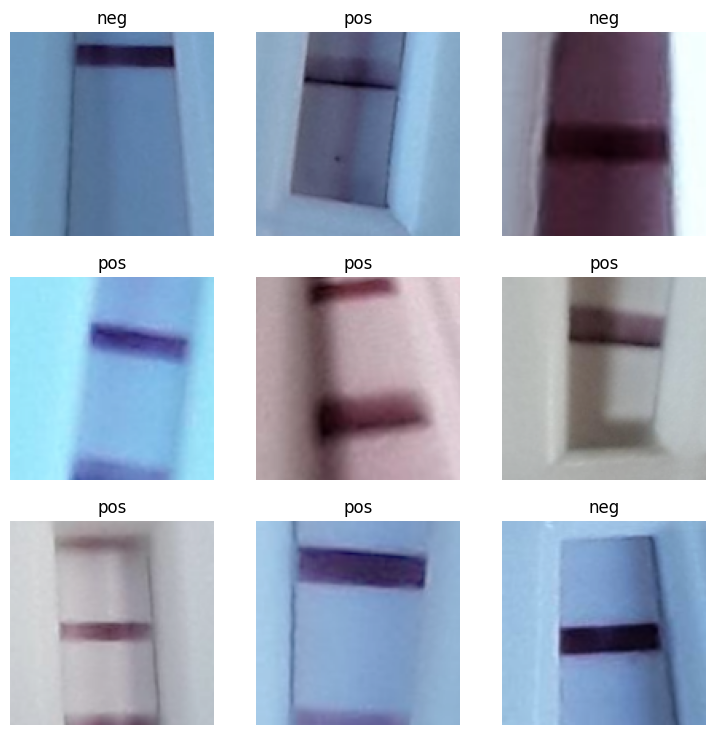

In [4]:
path_training = Path('data/training')

# Create DataLoaders from the folder structure
dls = ImageDataLoaders.from_folder(
    path_training,    # Path to the folder containing 'pos' and 'neg'
    valid_pct=0.2,    # Use 20% of the data for validation
    seed=42,          # Ensure reproducibility by setting a seed
    item_tfms=Resize(128),  # Resize images to 224x224 for training
    batch_tfms=aug_transforms(),  # Apply default image augmentations
    bs=32  # Batch size (you can adjust based on available GPU memory)
)

dls.show_batch()

learn = vision_learner(dls, 'mobilenetv3_small_100', metrics=accuracy)

learn.fine_tune(10)

In [20]:
# # Get the interpretation
# interp = ClassificationInterpretation.from_learner(learn)

# # Plot the top losses
# interp.plot_top_losses(k=9, nrows=3)

# # Plot the confusion matrix
# interp.plot_confusion_matrix(figsize=(8,8))

# # Show the most confused classes
# interp.most_confused(min_val=2)

# Training on L1 with tiny model

In [21]:
# path_training = Path('data/L1')

# # Create DataLoaders from the folder structure
# dls = ImageDataLoaders.from_folder(
#     path_training,    # Path to the folder containing 'pos' and 'neg'
#     valid_pct=0.2,    # Use 20% of the data for validation
#     seed=42,          # Ensure reproducibility by setting a seed
#     item_tfms=Resize(128, method='pad', pad_mode='zeros'),  # Resize images to 224x224 for training
#     batch_tfms=aug_transforms(),  # Apply default image augmentations
#     bs=32  # Batch size (you can adjust based on available GPU memory)
# )

# dls.show_batch()

# learn = vision_learner(dls, 'mobilenetv3_small_100', metrics=accuracy)

# learn.fine_tune(1)

In [22]:
path_training = Path('data/L1')

# Create DataLoaders from the folder structure
dls = ImageDataLoaders.from_folder(
    path_training,    # Path to the folder containing 'pos' and 'neg'
    valid_pct=0.2,    # Use 20% of the data for validation
    seed=42,          # Ensure reproducibility by setting a seed
    item_tfms=Resize(128, method='pad', pad_mode='zeros'),  # Resize images to 224x224 for training
    batch_tfms=aug_transforms(),  # Apply default image augmentations
    bs=32  # Batch size (you can adjust based on available GPU memory)
)

# dls.show_batch()

learn = vision_learner(dls, 'mobilenetv3_small_100', metrics=accuracy)

# learn.lr_find(suggest_funcs=[valley, slide])

: 

In [23]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time


In [14]:
path_training = Path('data/S1')

# Create DataLoaders from the folder structure
dls = ImageDataLoaders.from_folder(
    path_training,    # Path to the folder containing 'pos' and 'neg'
    valid_pct=0.2,    # Use 20% of the data for validation
    seed=42,          # Ensure reproducibility by setting a seed
    item_tfms=Resize(128, method='pad', pad_mode='zeros'),  # Resize images to 224x224 for training
    batch_tfms=aug_transforms(),  # Apply default image augmentations
    bs=32  # Batch size (you can adjust based on available GPU memory)
)

learn = vision_learner(dls, 'mobilenetv3_small_100', metrics=accuracy)


epoch,train_loss,valid_loss,accuracy,time
0,0.765295,0.379142,0.823198,00:50


epoch,train_loss,valid_loss,accuracy,time
0,0.383059,0.193831,0.936937,00:56
1,0.282321,0.218269,0.939189,00:55
2,0.276526,0.161308,0.945946,00:53
3,0.232697,0.148001,0.949324,00:54
4,0.199319,0.112452,0.960586,00:55
5,0.153982,0.116519,0.956081,00:54
6,0.149241,0.090781,0.970721,00:55
7,0.119819,0.077930,0.974099,00:55
8,0.113063,0.080726,0.971847,00:54
9,0.109495,0.083659,0.971847,00:54


In [18]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time
0,0.090347,0.057064,0.975225,00:54
1,0.087494,0.081274,0.970721,00:55
2,0.088022,0.072110,0.981982,00:54
3,0.082826,0.042420,0.986486,00:53
4,0.075452,0.027334,0.989865,00:54
5,0.068292,0.057171,0.981982,00:55
6,0.066815,0.031960,0.987613,00:55
7,0.051178,0.027760,0.988739,00:55
8,0.049681,0.028605,0.986486,00:55
9,0.053136,0.029938,0.987613,00:54


In [ ]:
# Training on both L1 and S1 with tiny model

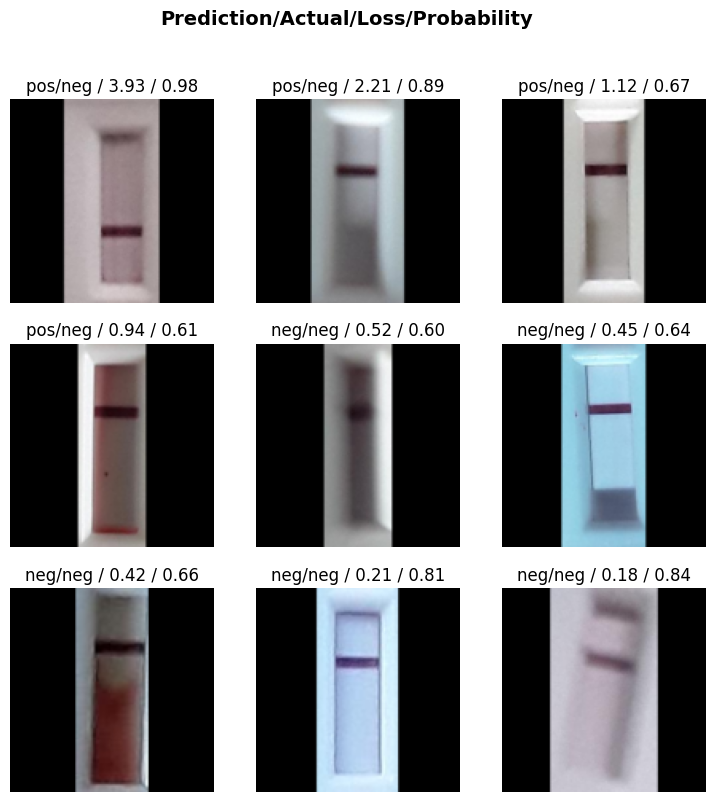

In [6]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(k=9, nrows=3)

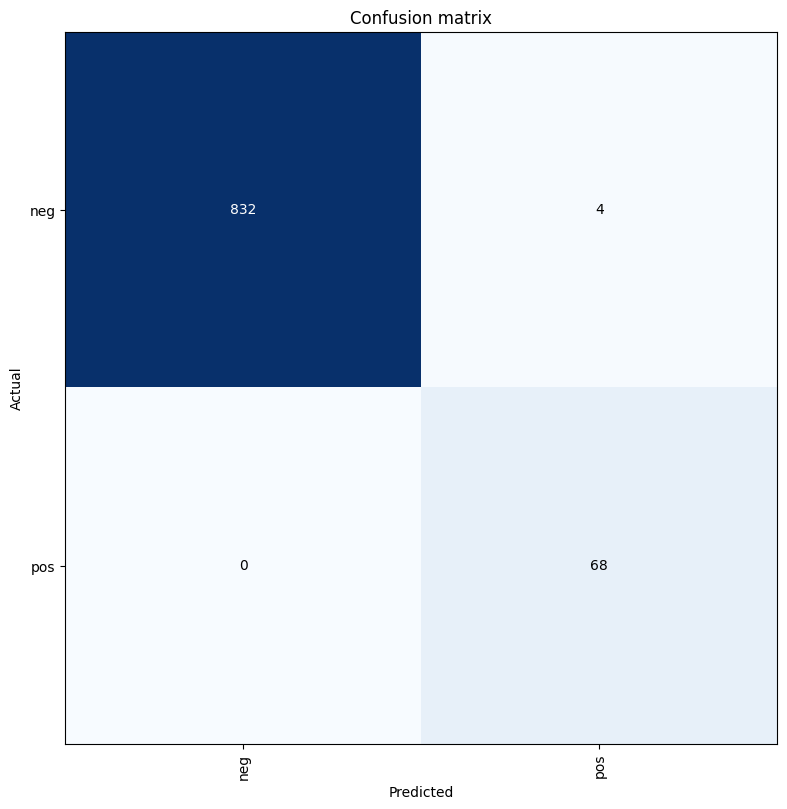

In [7]:
interp.plot_confusion_matrix(figsize=(8,8))

In [8]:

interp.most_confused(min_val=2)

[('neg', 'pos', 4)]

## Inference on the three other folders

In [15]:
# Function to get only .jpg images from the 'pos' and 'neg' subfolders
def get_images_from_folder(folder_path, n=50):
    pos_images = (Path(folder_path) / 'pos').glob('*.jpg')
    neg_images = (Path(folder_path) / 'neg').glob('*.jpg')
    
    pos_images = list(pos_images)  # Convert generator to list
    neg_images = list(neg_images)
    
    return random.sample(pos_images, n//2) + random.sample(neg_images, n//2)

# Function to run inference and calculate accuracy
def test_inference_on_folder(folder):
    images = get_images_from_folder(folder)
    correct = 0
    total = len(images)

    for img_path in images:
        # Load image
        img = PILImage.create(img_path)
        
        # Get true label from folder name (pos -> 1, neg -> 0)
        true_label = 1 if img_path.parent.name == 'pos' else 0
        
        # Run inference
        pred_class, pred_idx, probs = learn.predict(img)
        
        # Check if prediction matches the true label
        if pred_idx == true_label:
            correct += 1
    
    # Calculate accuracy
    accuracy = correct / total
    print(f"Accuracy on {folder}: {accuracy * 100:.2f}%")

# Test on each folder: data/L2, data/S1, data/S2
folders = ['data/L1', 'data/L2', 'data/S1', 'data/S2']
for folder in folders:
    test_inference_on_folder(folder)

Accuracy on data/L1: 82.00%


Accuracy on data/L2: 80.00%


Accuracy on data/S1: 92.00%


Accuracy on data/S2: 52.00%


# Training on both L1 and S1 with tiny model

In [4]:
from fastai.vision.all import *

# Define the paths for L1 and S1
path_l1 = Path('data/L1')
path_s1 = Path('data/S1')

# Function to gather images from multiple folders
def get_image_files_multi(*folders):
    all_files = []
    for folder in folders:
        all_files += get_image_files(folder)
    return all_files

# Create a DataBlock to load data from both L1 and S1
block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=lambda: get_image_files_multi(path_l1, path_s1),  # Gather images from both folders
    get_y=parent_label,  # Labels are 'pos' or 'neg', derived from parent folder name
    splitter=RandomSplitter(valid_pct=0.2, seed=42),  # 20% validation split
    item_tfms=Resize(224),  # Resize images to 224x224
    batch_tfms=aug_transforms()  # Apply default augmentations
)

# Create the DataLoaders from the DataBlock
dls = block.dataloaders(path='.', bs=32)

# Show a batch of images
dls.show_batch()

# Create the learner
learn = vision_learner(dls, resnet18, metrics=accuracy)

# Train the model
learn.fine_tune(1)


TypeError: DataBlock.dataloaders() missing 1 required positional argument: 'source'

## L1 with different models

In [5]:
path_training = Path('data/L1')
dls = ImageDataLoaders.from_folder(
    path_training,  
    valid_pct=0.2,  
    seed=42,     
    item_tfms=Resize(128, method='pad', pad_mode='zeros'), 
    batch_tfms=aug_transforms(),  
    bs=32  
)

# dls.show_batch()

In [3]:
chosen_model = 'mobilenetv3_small_100'
learn = vision_learner(dls, chosen_model, metrics=accuracy)
learn.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.746626,0.282342,0.876106,01:18


epoch,train_loss,valid_loss,accuracy,time
0,0.299789,0.119101,0.957965,01:26
1,0.207534,0.071150,0.974558,01:12


In [4]:
chosen_model = 'mobilenetv3_small_100'
learn = vision_learner(dls, chosen_model, metrics=accuracy)
learn.fit(4, lr=0.05)

epoch,train_loss,valid_loss,accuracy,time
0,0.640932,0.255973,0.956858,01:00
1,0.246244,0.358807,0.954646,00:49
2,0.175595,0.135303,0.988938,00:47
3,0.337066,20.066326,0.829646,00:49


In [7]:
chosen_model = 'mobilenetv3_small_100'
learn = vision_learner(dls, chosen_model, metrics=accuracy)
learn.fit(2, lr=1)

epoch,train_loss,valid_loss,accuracy,time
0,79.826370,4008.067383,0.857301,01:04
1,64.332253,444694102278144.000000,0.139381,00:50


In [8]:
chosen_model = 'mobilenetv3_small_100'
learn = vision_learner(dls, chosen_model, metrics=accuracy)
learn.fit(2, lr=0.0001)

epoch,train_loss,valid_loss,accuracy,time
0,1.099745,0.838804,0.519912,00:40
1,0.922859,0.681869,0.618363,00:49


: 

In [5]:
# This one crashed the kernel

# chosen_model = 'mobilenetv2_100'
# learn = vision_learner(dls, chosen_model, metrics=accuracy)
# learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time


In [9]:
chosen_model = 'efficientnet_lite0'
learn = vision_learner(dls, chosen_model, metrics=accuracy)
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time


In [ ]:
chosen_model = 'tf_efficientnet_b0'
learn = vision_learner(dls, chosen_model, metrics=accuracy)
learn.fine_tune(4)

In [2]:
import timm
timm.list_models()

/home/carljvh/mambaforge/envs/ahri_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'beitv2_base_patch16_224',
 'beitv2_large_patch16_224',
 'botnet26t_256',
 'botnet50ts_256',
 'caformer_b36',
 'caformer_m36',
 'caformer_s18',
 'caformer_s36',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_medium',
 'coat_lite_medium_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_small',
 'coat_tiny',
 'coatnet_0_224',
 'coatnet_0_rw_224',
 'coatnet_1_224',
 'coatnet_1_rw_224',
 'coatnet_2_224',
 'coatnet_2_rw_224',
 'coatnet_3_224',
 'coatnet_3_rw_224',
 'coatnet_4_224',
 'coatnet_5_224',
 'coatnet_bn_0_rw_224',
 'coatnet_nano_cc_224',
 'coatnet_nano_rw_224',
 'coatnet_pico_rw_224',
 'coatnet_rmlp_0_rw_224',
 'coatnet_rmlp_1_rw2_224',
 'coatnet_rmlp_1_r

In [6]:
chosen_model = 'convnext_pico'
learn = vision_learner(dls, chosen_model, metrics=accuracy)
learn.fine_tune(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.577344,0.139649,0.969027,02:05


epoch,train_loss,valid_loss,accuracy,time
0,0.115760,0.038015,0.988938,02:20


: 

# Smaller dataset "training"

In [3]:
path_training = Path('data/training')

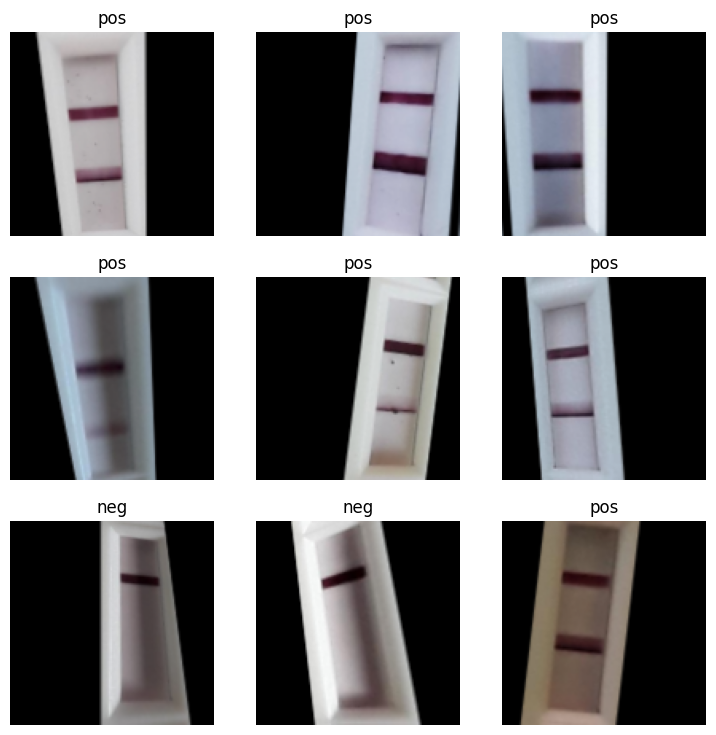

In [4]:
dls = ImageDataLoaders.from_folder(
    path_training,    # Path to the folder containing 'pos' and 'neg'
    valid_pct=0.2,    # Use 20% of the data for validation
    seed=42,          # Ensure reproducibility by setting a seed
    item_tfms=Resize(128, method='pad', pad_mode='zeros'),  # Resize images to 224x224 for training
    batch_tfms=aug_transforms(),  # Apply default image augmentations
    bs=32  # Batch size (you can adjust based on available GPU memory)
)

dls.show_batch()

In [5]:
chosen_model = 'mobilenetv3_small_100'
learn = vision_learner(dls, chosen_model, metrics=accuracy)
learn.fit(4, lr=0.05)

epoch,train_loss,valid_loss,accuracy,time
0,3.547453,30.054279,0.475000,00:14
1,3.149021,3.593276,0.600000,00:08
2,2.330066,12.669273,0.475000,00:05
3,1.817734,0.189299,0.975000,00:05


In [6]:
learn = vision_learner(dls, chosen_model, metrics=accuracy)
learn.fine_tune(8)

epoch,train_loss,valid_loss,accuracy,time
0,1.399245,0.567607,0.725000,00:04


epoch,train_loss,valid_loss,accuracy,time
0,1.119687,0.574162,0.700000,00:04
1,0.969009,0.573930,0.675000,00:04
2,0.861183,0.720397,0.700000,00:03
3,0.786108,0.477807,0.750000,00:04
4,0.734218,0.486706,0.775000,00:04
5,0.677852,0.553079,0.775000,00:04
6,0.672267,0.508596,0.800000,00:04
7,0.634570,0.564892,0.775000,00:04


# Training on more data

In [2]:
# # Define your paths
# path_l1 = Path('data/L1')  # Path to 'pos' and 'neg' in L1
# path_s2 = Path('data/S2')  # Path to 'pos' and 'neg' in S2
# combined_path = Path('data/combined')  # Path to where you want to combine both datasets

# # Ensure the combined directory exists
# os.makedirs(combined_path / 'pos', exist_ok=True)
# os.makedirs(combined_path / 'neg', exist_ok=True)

# # Function to check for valid .jpg files
# def is_valid_file(img_path):
#     return img_path.is_file() and img_path.suffix.lower() == '.jpg'

# # Symlink images from L1 to combined
# for folder in ['pos', 'neg']:
#     for img in (path_l1 / folder).glob('*'):
#         if is_valid_file(img):
#             try:
#                 os.symlink(img, combined_path / folder / img.name)
#             except FileExistsError:
#                 pass  # Skip if the file already exists

# # Symlink images from S2 to combined
# for folder in ['pos', 'neg']:
#     for img in (path_s2 / folder).glob('*'):
#         if is_valid_file(img):
#             try:
#                 os.symlink(img, combined_path / folder / img.name)
#             except FileExistsError:
#                 pass  # Skip if the file already exists

# # Verify the contents of the combined folder
# !ls -R combined

ls: cannot access 'combined': No such file or directory


In [2]:
import os
from pathlib import Path

# Define your paths
path_l1 = Path('data/L1')  # Path to 'pos' and 'neg' in L1
path_s2 = Path('data/S2')  # Path to 'pos' and 'neg' in S2
combined_path = Path('data/combined')  # Path to where you want to combine both datasets

# Check the current working directory
print("Current working directory:", os.getcwd())

# Ensure the combined directory exists
os.makedirs(combined_path / 'pos', exist_ok=True)
os.makedirs(combined_path / 'neg', exist_ok=True)

# Print paths to check if directories are created correctly
print(f"Combined directory structure created: {combined_path / 'pos'}, {combined_path / 'neg'}")

def is_valid_file(img_path):
    return img_path.is_file() and img_path.suffix.lower() == '.jpg' and ':Zone.Identifier' not in img_path.name


# Symlink images from L1 to combined using absolute paths
for folder in ['pos', 'neg']:
    for img in (path_l1 / folder).glob('*'):
        if is_valid_file(img):
            try:
                os.symlink(img.resolve(), combined_path / folder / img.name)
            except FileExistsError:
                pass  # Skip if the file already exists

# Symlink images from S2 to combined using absolute paths
for folder in ['pos', 'neg']:
    for img in (path_s2 / folder).glob('*'):
        if is_valid_file(img):
            try:
                os.symlink(img.resolve(), combined_path / folder / img.name)
            except FileExistsError:
                pass  # Skip if the file already exists

# Verify the contents of the combined folder
print("\nContents of combined folder:")
!ls -R data/combined


Current working directory: /home/carljvh/Wimmy/ahri_git/ahri_practicals/hiv_vision
Combined directory structure created: data/combined/pos, data/combined/neg

Contents of combined folder:
data/combined:
models	neg  pos

data/combined/models:
tmpy1jeodg1

data/combined/models/tmpy1jeodg1:
_tmp.pth

data/combined/neg:
manual_crop_A_20180130173028_pid274_GmxoCD.jpg
manual_crop_A_20180130173334_pid274_sjFd3M.jpg
manual_crop_A_20180201170354_pid277_xEt7Is.jpg
manual_crop_A_20180201170357_pid277_5XIQrX.jpg
manual_crop_A_20180201170412_pid277_EHm3jY.jpg
manual_crop_A_20180201170454_pid277_hnoiXa.jpg
manual_crop_A_20180201170552_pid277_3ZIVdz.jpg
manual_crop_A_20180201170642_pid277_2q9dFz.jpg
manual_crop_A_20180201170718_pid277_5dupfG.jpg
manual_crop_A_20180201170727_pid277_euZa29.jpg
manual_crop_A_20180201170807_pid277_im4g7f.jpg
manual_crop_A_20180201171006_pid277_7nKAS8.jpg
manual_crop_A_20180201173203_pid276_vdrZnE.jpg
manual_crop_A_20180201173427_pid276_cpZ643.jpg
manual_crop_A_2018020117

In [3]:
dls = ImageDataLoaders.from_folder(
    combined_path,    # Combined path containing 'pos' and 'neg'
    valid_pct=0.2,    # Use 20% of the data for validation
    seed=42,          # Ensure reproducibility by setting a seed
    item_tfms=Resize(128, method='pad', pad_mode='zeros'),  # Resize images to 128x128
    batch_tfms=aug_transforms(),  # Apply default image augmentations
    bs=32  # Batch size
)

In [4]:
print(len(dls.train_ds), len(dls.valid_ds))

5544 1386


In [5]:
chosen_model = 'mobilenetv3_small_100'
learn = vision_learner(dls, chosen_model, metrics=accuracy)
learn.fine_tune(2)
a

epoch,train_loss,valid_loss,accuracy,time
0,0.548523,0.291053,0.876623,01:42


epoch,train_loss,valid_loss,accuracy,time
0,0.258517,0.135797,0.955988,01:39
1,0.152282,0.112399,0.963203,01:17


In [7]:
learn.save('mobile_L1S2_2epochs')

Path('data/combined/models/mobile_L1S2_2epochs.pth')

In [23]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time


# Inference on the other data

In [9]:
# Function to get only .jpg images from the 'pos' and 'neg' subfolders
def get_images_from_folder(folder_path, n=200):
    pos_images = (Path(folder_path) / 'pos').glob('*.jpg')
    neg_images = (Path(folder_path) / 'neg').glob('*.jpg')
    
    pos_images = list(pos_images)  # Convert generator to list
    neg_images = list(neg_images)
    
    return random.sample(pos_images, n//2) + random.sample(neg_images, n//2)

# Function to run inference and calculate accuracy
def test_inference_on_folder(folder):
    images = get_images_from_folder(folder)
    correct = 0
    total = len(images)

    for img_path in images:
        # Load image
        img = PILImage.create(img_path)
        
        # Get true label from folder name (pos -> 1, neg -> 0)
        true_label = 1 if img_path.parent.name == 'pos' else 0
        
        # Run inference
        pred_class, pred_idx, probs = learn.predict(img)
        
        # Check if prediction matches the true label
        if pred_idx == true_label:
            correct += 1
    
    # Calculate accuracy
    accuracy = correct / total
    print(f"Accuracy on {folder}: {accuracy * 100:.2f}%")

# Test on each folder: data/L2, data/S1, data/S2
folders = ['data/L1', 'data/L2', 'data/S1', 'data/S2']
for folder in folders:
    test_inference_on_folder(folder)

Accuracy on data/L1: 95.00%


Accuracy on data/L2: 93.50%


Accuracy on data/S1: 65.50%


Accuracy on data/S2: 75.50%


In [10]:
# Function to get images from the folder
def get_images_from_folder(folder_path, n=200):
    pos_images = (Path(folder_path) / 'pos').glob('*.jpg')
    neg_images = (Path(folder_path) / 'neg').glob('*.jpg')
    
    pos_images = list(pos_images)  # Convert generator to list
    neg_images = list(neg_images)
    
    return random.sample(pos_images, n//2) + random.sample(neg_images, n//2)

# Function to run inference and calculate accuracy
def test_inference_on_folder(folder):
    images = get_images_from_folder(folder)
    correct = 0
    total = len(images)

    for img_path in images:
        # Load image
        img = PILImage.create(img_path)
        
        # Get true label from folder name (pos -> 1, neg -> 0)
        true_label = 1 if img_path.parent.name == 'pos' else 0
        
        # Run inference
        pred_class, pred_idx, probs = learn.predict(img)
        
        # Check if prediction matches the true label
        if pred_idx == true_label:
            correct += 1
    
    # Calculate accuracy
    accuracy = correct / total
    return accuracy * 100

# Store results in a list
results = []

# Test on each folder: data/L2, data/S1, data/S2
folders = ['data/L1', 'data/L2', 'data/S1', 'data/S2']
for folder in folders:
    accuracy = test_inference_on_folder(folder)
    results.append((folder, accuracy))

In [ ]:
# Define paths to the folders containing images for inference
path_l2 = Path('data/L2')  # Path to 'pos' and 'neg' in L2
path_s1 = Path('data/S1')  # Path to 'pos' and 'neg' in S1

# Function to calculate accuracy on a folder
def calculate_accuracy(folder_path, true_label):
    image_files = get_image_files(folder_path)  # Get all images in the folder
    correct = 0
    total = len(image_files)

    if total == 0:
        return 0.0, 0  # No images found

    for img_file in image_files:
        img = PILImage.create(img_file)  # Load the image
        pred, _, _ = learn.predict(img)  # Get the predicted label
        if pred == true_label:
            correct += 1  # Count correct predictions

    accuracy = correct / total
    return accuracy, total

# Calculate accuracy for each folder
accuracy_l2_pos, total_l2_pos = calculate_accuracy(path_l2 / 'pos', 'pos')
accuracy_l2_neg, total_l2_neg = calculate_accuracy(path_l2 / 'neg', 'neg')
accuracy_s1_pos, total_s1_pos = calculate_accuracy(path_s1 / 'pos', 'pos')
accuracy_s1_neg, total_s1_neg = calculate_accuracy(path_s1 / 'neg', 'neg')

# Display the results
print(f"L2 Pos: Accuracy = {accuracy_l2_pos:.2%} ({total_l2_pos} images)")
print(f"L2 Neg: Accuracy = {accuracy_l2_neg:.2%} ({total_l2_neg} images)")
print(f"S1 Pos: Accuracy = {accuracy_s1_pos:.2%} ({total_s1_pos} images)")
print(f"S1 Neg: Accuracy = {accuracy_s1_neg:.2%} ({total_s1_neg} images)")

# Overall accuracy for L2 and S1
total_images_l2 = total_l2_pos + total_l2_neg
total_images_s1 = total_s1_pos + total_s1_neg

if total_images_l2 > 0:
    overall_accuracy_l2 = (accuracy_l2_pos * total_l2_pos + accuracy_l2_neg * total_l2_neg) / total_images_l2
    print(f"\nOverall L2 Accuracy: {overall_accuracy_l2:.2%}")
else:
    print("\nNo images found in L2 for inference.")

if total_images_s1 > 0:
    overall_accuracy_s1 = (accuracy_s1_pos * total_s1_pos + accuracy_s1_neg * total_s1_neg) / total_images_s1
    print(f"Overall S1 Accuracy: {overall_accuracy_s1:.2%}")
else:
    print("No images found in S1 for inference.")

In [11]:
for folder, accuracy in results:
    print(f"Accuracy on {folder}: {accuracy:.2f}%")

Accuracy on data/L1: 97.00%
Accuracy on data/L2: 94.00%
Accuracy on data/S1: 67.00%
Accuracy on data/S2: 74.00%
